In [1]:
# Multiple Linear Regression Analysis (Supervised Machine Learning)
# Dataset_House prices from King County

In [2]:
#importing numpy and pandas, seaborn

import numpy as np #linear algebra
import pandas as pd #datapreprocessing, CSV file I/O
import seaborn as sns #for plotting graphs
import matplotlib.pyplot as plt

In [3]:
Path='E:/4th Sem _MBA/BIA/Project_BIA/House_Data.csv'
housedata=pd.read_csv(Path)

In [4]:
housedata.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
housedata.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
print(housedata.shape)

(21613, 21)


In [7]:
print(housedata.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [8]:
housedata.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
#checking the data types
housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

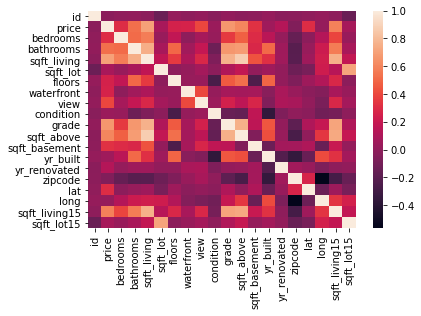

In [10]:
# check for any correlations between variables
corr = housedata.corr()
sns.heatmap(corr)

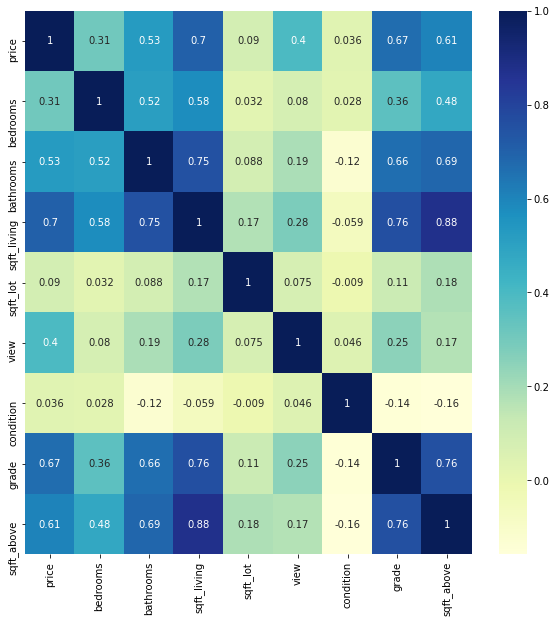

In [11]:
#heatmap for all the required features for correlation with the variables which we will consider for regression
df=housedata[['price', 'bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot','view', 'condition', 'grade',
    'sqft_above']]
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df.corr(),cmap = 'YlGnBu',annot=True,ax=ax)

In [12]:
housedata[["price","bedrooms","bathrooms","sqft_living","sqft_lot","view","condition","grade","sqft_above"]].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,condition,grade,sqft_above
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,0.234303,3.409430,7.656873,1788.390691
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.766318,0.650743,1.175459,828.090978
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,0.000000,1.000000,1.000000,290.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,0.000000,3.000000,7.000000,1190.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,0.000000,3.000000,7.000000,1560.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,0.000000,4.000000,8.000000,2210.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,4.000000,5.000000,13.000000,9410.000000


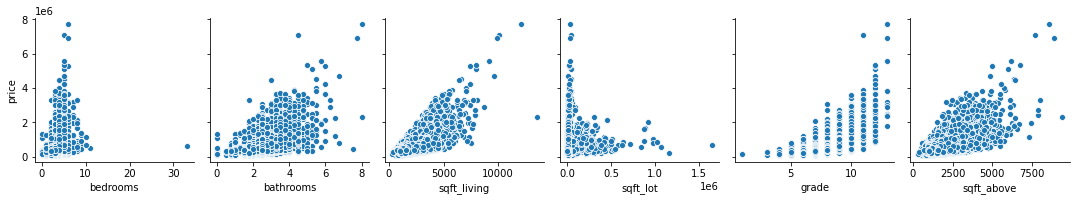

In [13]:
sns.pairplot(data=housedata, x_vars=["bedrooms","bathrooms","sqft_living","sqft_lot","grade","sqft_above"], y_vars=["price"])

In [14]:
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression 
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt

In [15]:
# Multiple Linear Regression Analysis (Supervised Machine Learning)

In [16]:
reg_model=ols(formula="price~bedrooms+bathrooms+sqft_living+sqft_lot+view+condition+grade+sqft_above",data=housedata).fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     3882.
Date:                Sat, 05 Dec 2020   Prob (F-statistic):               0.00
Time:                        20:52:44   Log-Likelihood:            -2.9798e+05
No. Observations:               21613   AIC:                         5.960e+05
Df Residuals:                   21604   BIC:                         5.960e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.818e+05   1.75e+04    -38.930      

In [17]:
anova_lm(reg_model)

,df,sum_sq,mean_sq,F,PR(>F)
bedrooms,1.0,2.769586e+14,2.769586e+14,5007.213742,0.000000e+00
bathrooms,1.0,5.318986e+14,5.318986e+14,9616.347052,0.000000e+00
sqft_living,1.0,6.677580e+14,6.677580e+14,12072.587706,0.000000e+00
sqft_lot,1.0,5.078755e+12,5.078755e+12,91.820263,1.048369e-21
view,1.0,1.113022e+14,1.113022e+14,2012.264411,0.000000e+00
condition,1.0,1.664142e+13,1.664142e+13,300.865024,6.068054e-67
grade,1.0,1.063899e+14,1.063899e+14,1923.454078,0.000000e+00
sqft_above,1.0,1.930598e+12,1.930598e+12,34.903839,3.515903e-09
Residual,21604.0,1.194959e+15,5.531192e+10,NaN,NaN


In [18]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices("price~bedrooms+bathrooms+sqft_living+sqft_lot+view+condition+grade+sqft_above",data=housedata,return_type='dataframe')

In [20]:
#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

In [21]:
vif

,VIF,variable
0,119.844731,Intercept
1,1.628989,bedrooms
2,2.558070,bathrooms
3,6.918588,sqft_living
4,1.049917,sqft_lot
5,1.155793,view
6,1.081997,condition
7,2.841084,grade
8,5.087750,sqft_above
